Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'EOS'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-30,1.071760,0.989566,1.031340,1.006690,1.361300e+07,1.006690
2017-07-01,2.877510,0.822648,0.996521,2.710050,3.204520e+08,2.710050
2017-07-02,5.395970,2.632310,2.717390,4.086640,4.149500e+08,4.086640
2017-07-03,4.191240,2.933450,4.098010,3.372000,2.185590e+08,3.372000
2017-07-04,3.523500,2.730130,3.356000,3.003230,1.243390e+08,3.003230
...,...,...,...,...,...,...
2021-06-13,5.318657,4.963898,5.087619,5.127661,1.211495e+09,5.127661
2021-06-14,5.387097,5.118312,5.265985,5.284315,1.438399e+09,5.284315
2021-06-15,5.229988,4.834947,5.188779,4.863669,1.259760e+09,4.863669


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1445 entries, 2017-06-30 to 2021-06-19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1445 non-null   float64
 1   Low        1445 non-null   float64
 2   Open       1445 non-null   float64
 3   Close      1445 non-null   float64
 4   Volume     1445 non-null   float64
 5   Adj Close  1445 non-null   float64
 6   Spread     1445 non-null   float64
dtypes: float64(7)
memory usage: 90.3 KB


## Plot the closing value of Dogecoin over time

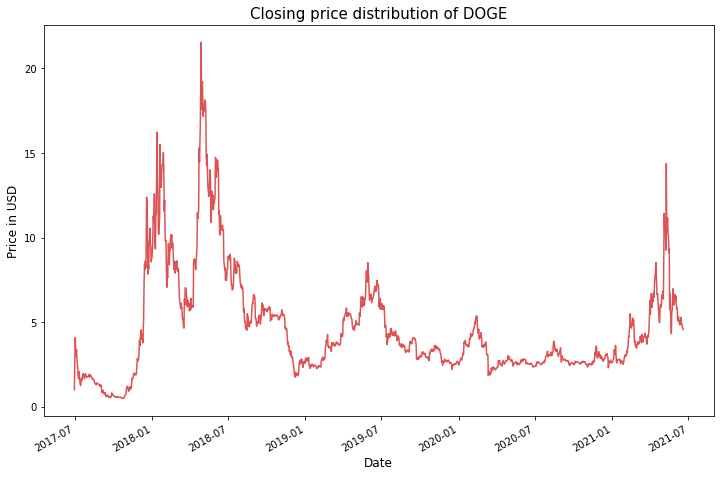

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of DOGE", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-30,1.071760,0.989566,1.031340,1.006690,1.361300e+07,1.006690
2017-07-01,2.877510,0.822648,0.996521,2.710050,3.204520e+08,2.710050
2017-07-02,5.395970,2.632310,2.717390,4.086640,4.149500e+08,4.086640
2017-07-03,4.191240,2.933450,4.098010,3.372000,2.185590e+08,3.372000
2017-07-04,3.523500,2.730130,3.356000,3.003230,1.243390e+08,3.003230
...,...,...,...,...,...,...
2021-06-13,5.318657,4.963898,5.087619,5.127661,1.211495e+09,5.127661
2021-06-14,5.387097,5.118312,5.265985,5.284315,1.438399e+09,5.284315
2021-06-15,5.229988,4.834947,5.188779,4.863669,1.259760e+09,4.863669


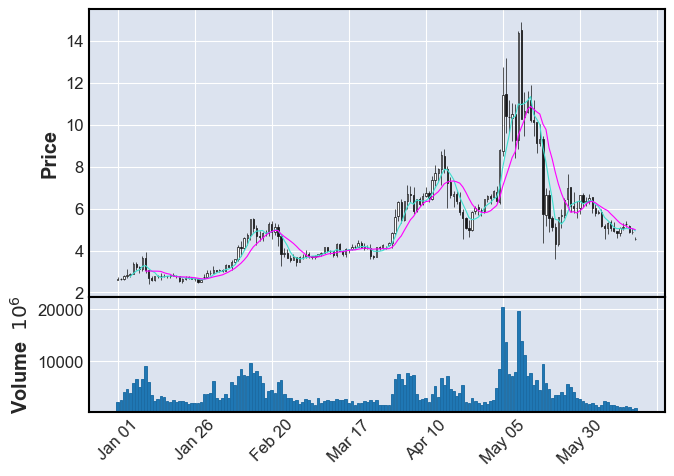

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
base_df

,High,Low,Open,Close,Volume,Adj Close,Spread
Date,,,,,,,
2017-06-30,1.071760,0.989566,1.031340,1.006690,1.361300e+07,1.006690,0.082194
2017-07-01,2.877510,0.822648,0.996521,2.710050,3.204520e+08,2.710050,2.054862
2017-07-02,5.395970,2.632310,2.717390,4.086640,4.149500e+08,4.086640,2.763660
2017-07-03,4.191240,2.933450,4.098010,3.372000,2.185590e+08,3.372000,1.257790
2017-07-04,3.523500,2.730130,3.356000,3.003230,1.243390e+08,3.003230,0.793370
...,...,...,...,...,...,...,...
2021-06-13,5.318657,4.963898,5.087619,5.127661,1.211495e+09,5.127661,0.354759
2021-06-14,5.387097,5.118312,5.265985,5.284315,1.438399e+09,5.284315,0.268785
2021-06-15,5.229988,4.834947,5.188779,4.863669,1.259760e+09,4.863669,0.395041


In [9]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
1277,2021-01-02,2.626426
1278,2021-01-03,2.795052
1279,2021-01-04,2.810309
1280,2021-01-05,2.897808
1281,2021-01-06,3.376757
...,...,...
1440,2021-06-13,5.127661
1441,2021-06-14,5.284315
1442,2021-06-15,4.863669
1443,2021-06-16,4.868918


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
169,2021-06-22,3.054093,1.974822,4.082298
170,2021-06-23,3.155619,1.998436,4.324246
171,2021-06-24,2.883333,1.691574,3.993297
172,2021-06-25,2.631199,1.468529,3.724107
173,2021-06-26,2.561815,1.356631,3.699319


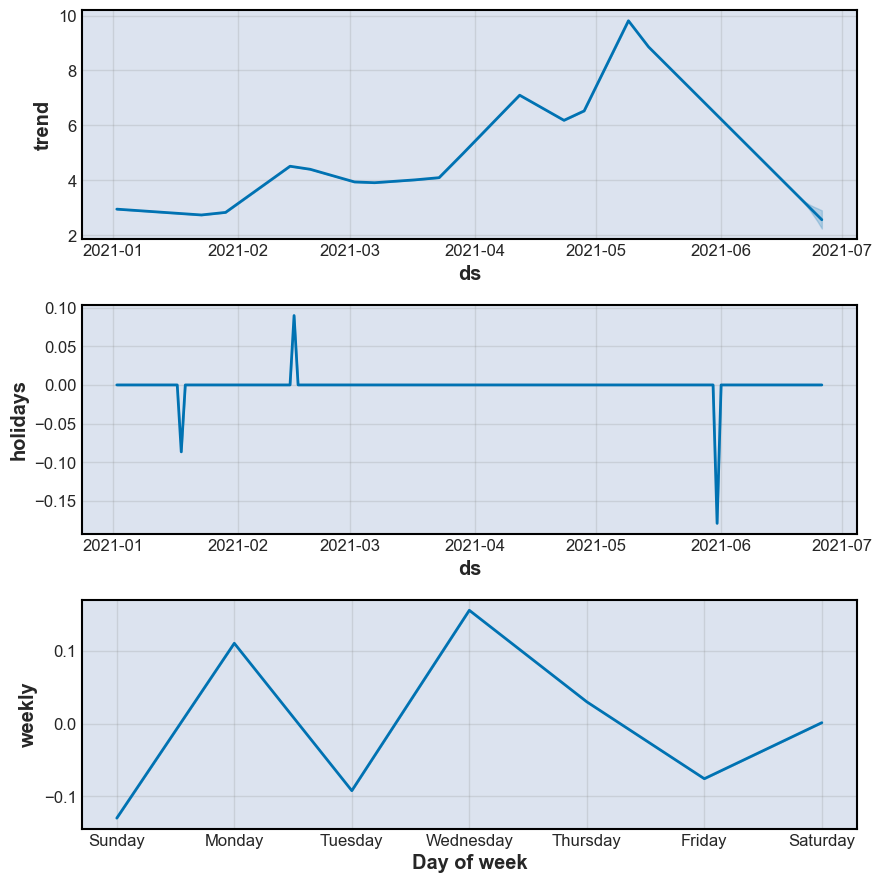

In [10]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
fig = m.plot_components(forecast)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

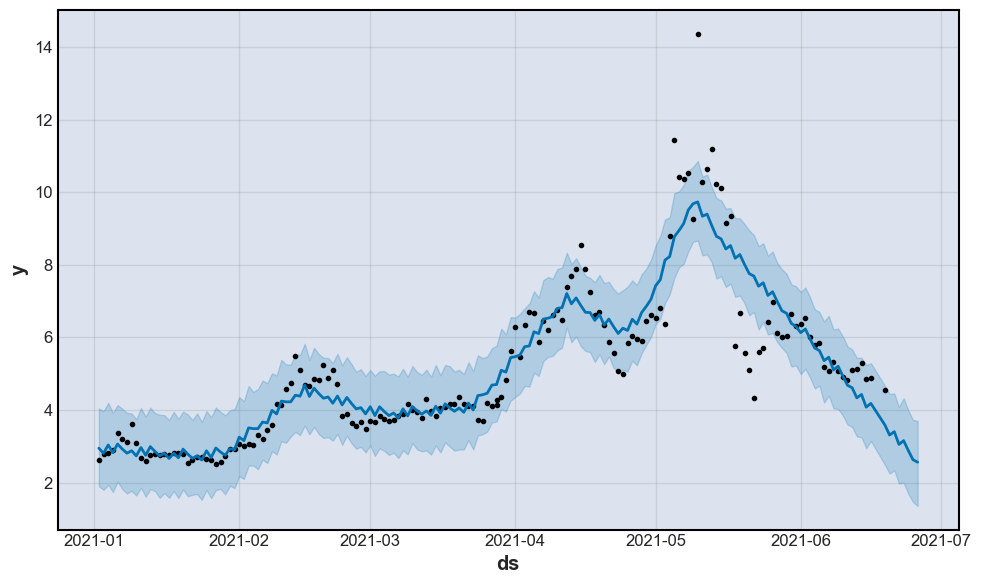

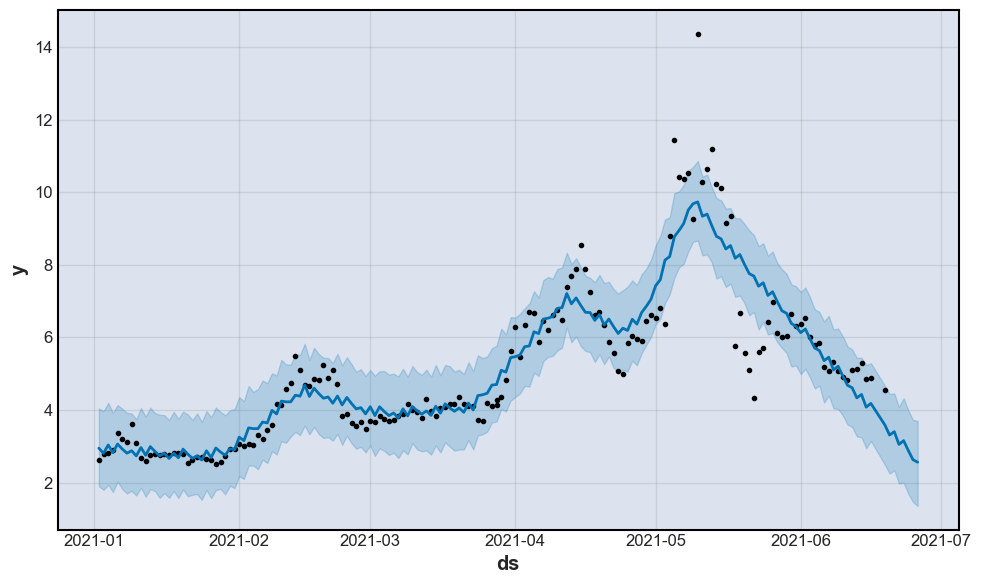

In [11]:
m.plot(forecast)

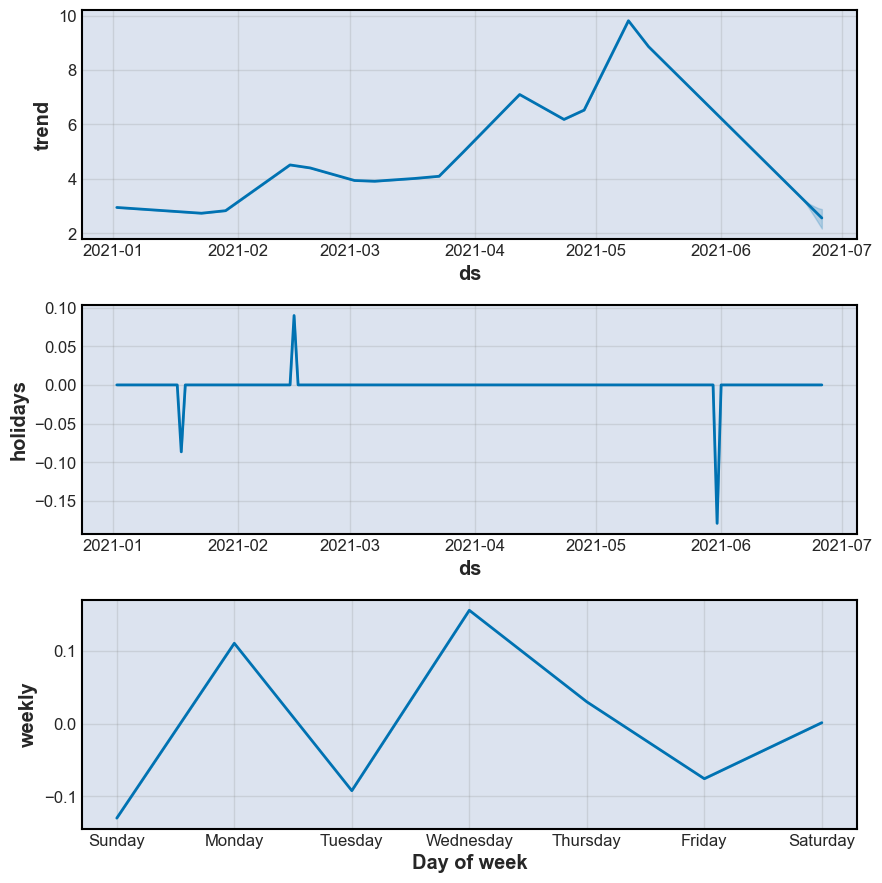

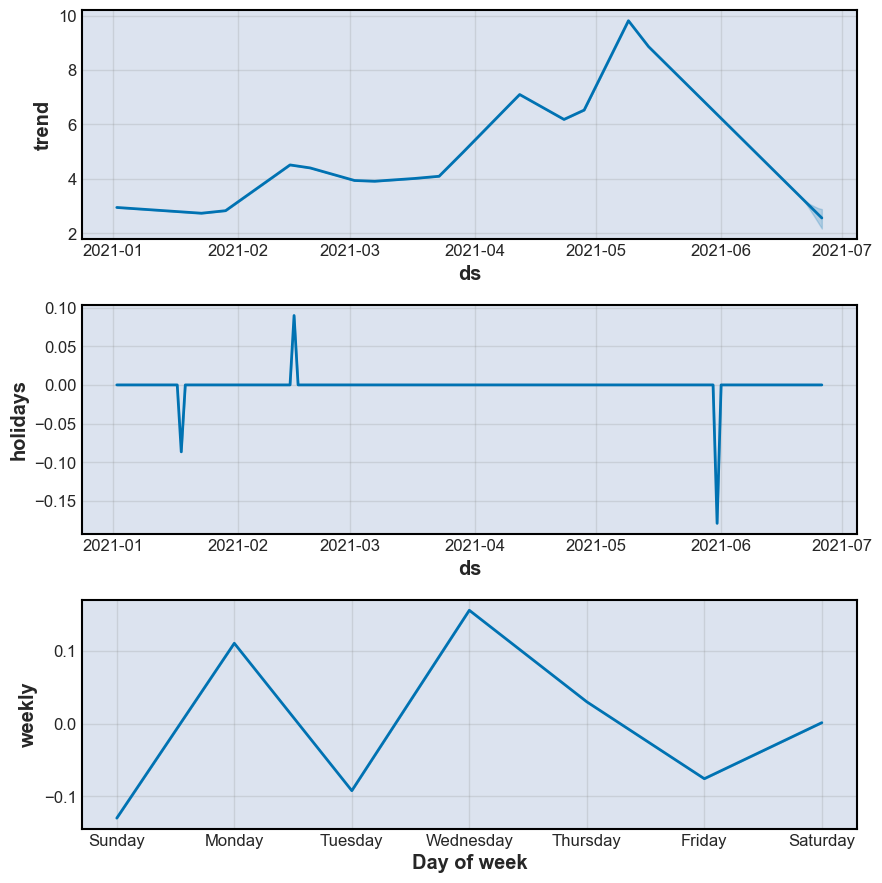

In [12]:
m.plot_components(forecast)